<a href="https://colab.research.google.com/github/lansanacisse/Fouilles-massives/blob/main/FdDV2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Libraries**

In [ ]:
# import library
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import ADASYN
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, f1_score
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

#**Importation des données**  

In [ ]:
# monter le drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Ajustez le chemin selon l'emplacement réel de votre fichier
data = pd.read_csv('/content/drive/MyDrive/Données/guillaume.txt', sep=';')

<ipython-input-4-0b8767bbf4e8>:2: DtypeWarning: Columns (1,2,5,6,7,8,9,15,16,22) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/drive/MyDrive/Données/guillaume.txt', sep=';')


# **Exploration des donées**

In [ ]:
# Sélectionner les colonnes signalées dans l'erreur
columns_of_interest = [1, 2, 5, 6, 7, 8, 9, 15, 16, 22]
data_selected_columns = data.iloc[:, columns_of_interest]

In [ ]:
data_selected_columns.head()

,IDAvisAutorisationCheque,FlagImpaye,CodeDecision,VerifianceCPT1,VerifianceCPT2,VerifianceCPT3,D2CB,EcartNumCheq,NbrMagasin3J,Heure
0,78643044,0,1,0,0,0,551,0,1,27134
1,78643045,0,1,0,0,0,551,1,2,27817
2,78643046,0,1,0,0,0,549,0,1,28058
3,78643047,0,0,1,1,1,267,0,1,28128
4,78643048,0,1,0,0,0,549,1,1,29607


In [ ]:
# head dataset
data.head()

,ZIBZIN,IDAvisAutorisationCheque,FlagImpaye,Montant,DateTransaction,CodeDecision,VerifianceCPT1,VerifianceCPT2,VerifianceCPT3,D2CB,...,TauxImpNb_RB,TauxImpNB_CPM,EcartNumCheq,NbrMagasin3J,DiffDateTr1,DiffDateTr2,DiffDateTr3,CA3TRetMtt,CA3TR,Heure
0,A013010004908126703060931,78643044,0,20,2017-02-01 07:32:14,1,0,0,0,551,...,"37,186667890919111","52,076033757361408",0,1,4,4,4,20,0,27134
1,A013011306908024927155000,78643045,0,20,2017-02-01 07:43:37,1,0,0,0,551,...,"48,844716275908937","52,076033757361408",1,2,"1,7976851851851852",4,4,"28,609999999999999","8,6099999999999994",27817
2,A013010002908283134592527,78643046,0,"57,640000000000001",2017-02-01 07:47:38,1,0,0,0,549,...,"73,118279569892479","52,076033757361408",0,1,4,4,4,"57,640000000000001",0,28058
3,A011010002908105209831316,78643047,0,"54,289999999999999",2017-02-01 07:48:48,0,1,1,1,267,...,"110,05692599620494","53,554233554497365",0,1,4,4,4,"54,289999999999999",0,28128
4,A013010041908000125652029,78643048,0,"26,899999999999999",2017-02-01 08:13:27,1,0,0,0,549,...,"45,36831264567185","52,076033757361408",1,1,"1,9971064814814814",4,4,"59,149999999999999","32,25",29607


In [ ]:
# shape
data.shape

(4646774, 23)

In [ ]:
# Informations générales sur le dataset
print("\nInformations générales sur les données :")
print(data.info())


Informations générales sur les données :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4646774 entries, 0 to 4646773
Data columns (total 23 columns):
 #   Column                    Dtype 
---  ------                    ----- 
 0   ZIBZIN                    object
 1   IDAvisAutorisationCheque  object
 2   FlagImpaye                object
 3   Montant                   object
 4   DateTransaction           object
 5   CodeDecision              object
 6   VerifianceCPT1            object
 7   VerifianceCPT2            object
 8   VerifianceCPT3            object
 9   D2CB                      object
 10  ScoringFP1                object
 11  ScoringFP2                object
 12  ScoringFP3                object
 13  TauxImpNb_RB              object
 14  TauxImpNB_CPM             object
 15  EcartNumCheq              object
 16  NbrMagasin3J              object
 17  DiffDateTr1               object
 18  DiffDateTr2               object
 19  DiffDateTr3               object
 20  CA3T

In [ ]:
# Nombre de valeurs manquantes par variables
print("\nNombre de valeurs manquantes par variables :")
print(data.isnull().sum())


Nombre de valeurs manquantes par variables :
ZIBZIN                      0
IDAvisAutorisationCheque    0
FlagImpaye                  0
Montant                     0
DateTransaction             0
CodeDecision                0
VerifianceCPT1              0
VerifianceCPT2              0
VerifianceCPT3              0
D2CB                        0
ScoringFP1                  0
ScoringFP2                  0
ScoringFP3                  0
TauxImpNb_RB                0
TauxImpNB_CPM               0
EcartNumCheq                0
NbrMagasin3J                0
DiffDateTr1                 0
DiffDateTr2                 0
DiffDateTr3                 0
CA3TRetMtt                  0
CA3TR                       0
Heure                       0
dtype: int64


In [ ]:
# Statistiques descriptives
print("\nStatistiques descriptives :")
print(data.describe())


Statistiques descriptives :
                           ZIBZIN  IDAvisAutorisationCheque  FlagImpaye  \
count                     4646774                   4646774     4646774   
unique                    1280127                   3831106           5   
top     A075000041908023367242120                  79754784           0   
freq                          217                         2     4584151   

        Montant      DateTransaction  CodeDecision  VerifianceCPT1  \
count   4646774              4646774       4646774         4646774   
unique    42864              3097882            10              22   
top          30  2017-03-04 17:18:31             0               0   
freq      37028                   14       3483828         3593113   

        VerifianceCPT2  VerifianceCPT3     D2CB  ...       TauxImpNb_RB  \
count          4646774         4646774  4646774  ...            4646774   
unique              34              43     1103  ...                663   
top                

# **Traitement de données**

In [ ]:
def nettoyer_colonnes_par_indices(data, indices_colonnes):
    """
    Nettoie plusieurs colonnes spécifiées par leurs indices en supprimant les espaces,
    convertissant les valeurs en numérique, supprimant les valeurs non valides,
    et en les convertissant en entiers.

    Args:
        data (pd.DataFrame): Le DataFrame à traiter.
        indices_colonnes (list): Liste des indices des colonnes à nettoyer.

    Returns:
        pd.DataFrame: Le DataFrame avec les colonnes nettoyées.
    """
    # Parcourir les indices des colonnes
    for indice in indices_colonnes:
        # Obtenir le nom de la colonne depuis l'indice
        colonne = data.columns[indice]

        # Supprimer les espaces
        data[colonne] = data[colonne].astype(str).str.strip()
        # Convertir en numérique (remplace les erreurs par NaN)
        data[colonne] = pd.to_numeric(data[colonne], errors='coerce')
        # Supprimer les lignes avec des NaN dans la colonne
        data = data.dropna(subset=[colonne])
        # Convertir les valeurs en entiers
        data[colonne] = data[colonne].astype(int)

    return data

In [ ]:
# Liste des indices des colonnes à nettoyer
indices_colonnes = [1,2,5,6,7,8,9,15,16,22]

# Nettoyage des colonnes
data = nettoyer_colonnes_par_indices(data, indices_colonnes)

<ipython-input-5-4ed261047a84>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[colonne] = data[colonne].astype(int)
<ipython-input-5-4ed261047a84>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[colonne] = data[colonne].astype(str).str.strip()
<ipython-input-5-4ed261047a84>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas

In [ ]:
# verifier les types de mes données
data.dtypes

,0
ZIBZIN,object
IDAvisAutorisationCheque,int64
FlagImpaye,int64
Montant,object
DateTransaction,object
CodeDecision,int64
VerifianceCPT1,int64
VerifianceCPT2,int64
VerifianceCPT3,int64
D2CB,int64


In [ ]:
col_flot = ["Montant", "TauxImpNb_RB","TauxImpNB_CPM", "CA3TRetMtt", "CA3TR","ScoringFP1", 	"ScoringFP2", 	"ScoringFP3"]
col_str = ["ZIBZIN","IDAvisAutorisationCheque"]
co_date = ["DateTransaction"]
col_heure = ["Heure"]
# recuperer toutes les colonnnes qui ne foont pas parti de col_flot, col_str, col_heure, col_date dans col_int
col_int = [col for col in data.columns if col not in col_flot and col not in col_str and col not in col_heure and col not in co_date]
# afficher le nombre de chacune des liste
print("col_flot :", len(col_flot))
print("col_str :", len(col_str))
print("col_int :", len(col_int))
print("co_date :", len(co_date))
print("col_heure :", len(col_heure))

col_flot : 8
col_str : 2
col_int : 11
co_date : 1
col_heure : 1


In [ ]:
for col in col_flot:
    # Remplacer les virgules par des points dans les colonnes de type string
    data[col] = data[col].astype(str).str.replace(',', '.', regex=False)

    # Convertir les colonnes au type float
    data[col] = data[col].astype(float)

In [ ]:
# Convertir en int
for col in col_int:
    # Vérifier si la colonne n'est pas déjà de type int
    if data[col].dtype != 'int64':
        # Remplacer les virgules par des points, si nécessaire
        data[col] = data[col].astype(str).str.replace(',', '.')
        # Convertir en type float puis en int (pour éviter les problèmes avec les décimales)
        data[col] = data[col].astype(float).astype(int)

In [ ]:
# convertir la col_date en type date
data['DateTransaction'] = pd.to_datetime(data['DateTransaction'])


In [ ]:
# Conversion des secondes depuis minuit en format timedelta
data['Heure'] = pd.to_timedelta(data['Heure'], unit='s')

# Convertir en format HH:MM:SS en chaîne (ou datetime.time si nécessaire)
data['Heure'] = data['Heure'].apply(lambda x: (pd.Timestamp("00:00:00") + x).time())

In [ ]:
# afficher les col_int
data.head(20)

,ZIBZIN,IDAvisAutorisationCheque,FlagImpaye,Montant,DateTransaction,CodeDecision,VerifianceCPT1,VerifianceCPT2,VerifianceCPT3,D2CB,...,TauxImpNb_RB,TauxImpNB_CPM,EcartNumCheq,NbrMagasin3J,DiffDateTr1,DiffDateTr2,DiffDateTr3,CA3TRetMtt,CA3TR,Heure
0,A013010004908126703060931,78643044,0,20.00,2017-02-01 07:32:14,1,0,0,0,551,...,37.186668,52.076034,0,1,4,4,4,20.00,0.00,07:32:14
1,A013011306908024927155000,78643045,0,20.00,2017-02-01 07:43:37,1,0,0,0,551,...,48.844716,52.076034,1,2,1,4,4,28.61,8.61,07:43:37
2,A013010002908283134592527,78643046,0,57.64,2017-02-01 07:47:38,1,0,0,0,549,...,73.118280,52.076034,0,1,4,4,4,57.64,0.00,07:47:38
3,A011010002908105209831316,78643047,0,54.29,2017-02-01 07:48:48,0,1,1,1,267,...,110.056926,53.554234,0,1,4,4,4,54.29,0.00,07:48:48
4,A013010041908000125652029,78643048,0,26.90,2017-02-01 08:13:27,1,0,0,0,549,...,45.368313,52.076034,1,1,1,4,4,59.15,32.25,08:13:27
5,A044014706908021215591000,78643049,0,42.51,2017-02-01 08:13:53,1,0,0,0,523,...,24.223058,27.448962,0,1,4,4,4,42.51,0.00,08:13:53
6,A059010041908012913210426,78643050,0,50.84,2017-02-01 08:18:24,1,0,0,0,551,...,44.775178,52.076034,0,1,4,4,4,50.84,0.00,08:18:24
7,A013000077908491210714030,78643051,0,87.14,2017-02-01 08:19:28,1,0,0,0,547,...,30.935808,52.076034,0,1,4,4,4,87.14,0.00,08:19:28
8,A055054707908007521756697,78643052,0,40.00,2017-02-01 08:20:13,1,0,0,0,548,...,0.000000,35.493265,0,1,4,4,4,40.00,0.00,08:20:13
9,A013010041908001298460129,78643053,0,90.59,2017-02-01 08:24:09,1,0,0,0,538,...,45.368313,52.076034,0,1,4,4,4,90.59,0.00,08:24:09


In [ ]:
# Detecter les doublons
doublons = data.duplicated()
print("Nombre de doublons :", doublons.sum())


Nombre de doublons : 834734


Les données etant historisées nous allons retrnir les doublons


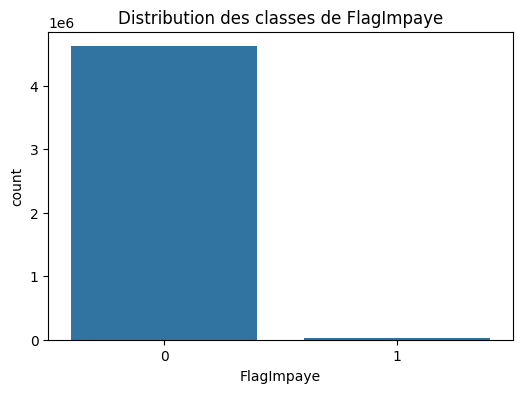

In [ ]:
# Distribution des classes de la variable cible 'FlagImpaye'
target = "FlagImpaye"
plt.figure(figsize=(6, 4))
sns.countplot(x=target, data=data)
plt.title('Distribution des classes de FlagImpaye')
plt.show()

## **Calculer les fréquences des classes**

In [ ]:
# Calcul des fréquences des classes
class_counts = data['FlagImpaye'].value_counts()

# Classe majoritaire et minoritaire
majority_class = class_counts.max()
minority_class = class_counts.min()

# Calcul de l'écart entre les classes
gap = majority_class - minority_class
print(f"\nClasse majoritaire : {majority_class}")
print(f"Classe minoritaire : {minority_class}")
print(f"Écart des classes : {gap}")


Classe majoritaire : 4616778
Classe minoritaire : 29995
Écart des classes : 4586783


## **Calculer les pourcentages pour mieux visualiser**

In [ ]:
# Calcul des pourcentages
total = class_counts.sum()
percentages = class_counts / total * 100


# Afficher l'écart en pourcentage
majority_percentage = percentages.max()
minority_percentage = percentages.min()
gap_percentage = majority_percentage - minority_percentage

print(f"\nPourcentage de la classe majoritaire : {majority_percentage:.2f}%")
print(f"Pourcentage de la classe minoritaire : {minority_percentage:.2f}%")
print(f"Écart en pourcentage : {gap_percentage:.2f}%")



Pourcentage de la classe majoritaire : 99.35%
Pourcentage de la classe minoritaire : 0.65%
Écart en pourcentage : 98.71%


## **Séparation des features et la cible**

In [ ]:
# Définir les plages de dates pour l'apprentissage et le test
train_start_date = "2017-02-01"
train_end_date = "2017-08-31"
test_start_date = "2017-09-01"
test_end_date = "2017-11-30"

In [ ]:
# Séparer les ensembles d'apprentissage et de test
train_data = data[(data['DateTransaction'] >= train_start_date) & (data['DateTransaction'] <= train_end_date)]
test_data = data[(data['DateTransaction'] >= test_start_date) & (data['DateTransaction'] <= test_end_date)]


In [ ]:
# Séparer les caractéristiques (X) et la variable cible (y)
X_train = train_data.drop(['IDAvisAutorisationCheque', 'ZIBZIN', 'Heure','FlagImpaye','DateTransaction'], axis=1)
y_train = train_data['FlagImpaye']

X_test = test_data.drop(['IDAvisAutorisationCheque', 'ZIBZIN', 'Heure','FlagImpaye','DateTransaction'], axis=1)
y_test = test_data['FlagImpaye']

In [ ]:
# Vérifier les dimensions
print(f"Dimensions des données d'entraînement: {X_train.shape}, {y_train.shape}")
print(f"Dimensions des données de test: {X_test.shape}, {y_test.shape}")

Dimensions des données d'entraînement: (3888468, 18), (3888468,)
Dimensions des données de test: (737068, 18), (737068,)


Supprimer les identifiants

# **ADASYN**

In [ ]:
# Instancier ADASYN
adasyn = ADASYN(sampling_strategy='minority', random_state=42, n_neighbors=5)

In [ ]:
# appliquer adasyn
X_train_resampled_adasyn, y_train_resampled_adasyn = adasyn.fit_resample(X_train, y_train)

In [ ]:
# Calculer la distribution des classes en pourcentage apres sur -echantillonnage
class_distribution_adasyn = pd.Series(y_train_resampled_adasyn).value_counts(normalize=True) * 100

# Afficher les résultats
print("Distribution des classes de 'FlagImpaye' après sur-échantillonnage (%):")
for classe, pourcentage in class_distribution_adasyn.items():
    print(f"Classe {classe}: {pourcentage:.2f}%")


Distribution des classes de 'FlagImpaye' après sur-échantillonnage (%):
Classe 1: 50.03%
Classe 0: 49.97%


#**Ramdom Over Sampling**

In [ ]:
from imblearn.over_sampling import RandomOverSampler

In [ ]:
# Appliquer RandomOverSampler uniquement sur l'ensemble d'apprentissage
ros = RandomOverSampler(random_state=42)
X_train_resampled_over, y_train_resampled_over = ros.fit_resample(X_train, y_train)

In [ ]:
# Calculer la distribution des classes en pourcentage apres sur -echantillonnage
class_distribution_over = pd.Series(y_train_resampled_over).value_counts(normalize=True) * 100

# Afficher les résultats
print("Distribution des classes de 'FlagImpaye' après sur-échantillonnage (%):")
for classe, pourcentage in class_distribution_over.items():
    print(f"Classe {classe}: {pourcentage:.2f}%")

NameError: name 'pd' is not defined

# **SMOTE**


In [ ]:
#Sur-échantillonnage (oversampling) des données
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Instancier l'objet SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Vérifier les nouvelles dimensions des données
X_train_smote.shape, y_train_smote.shape

((7730244, 18), (7730244,))

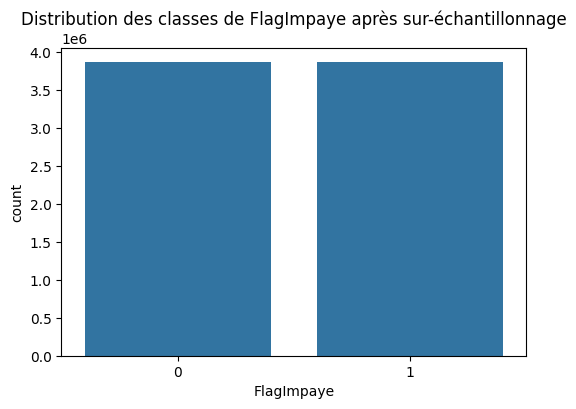

In [ ]:
# Distribution des classes de la variable cible 'FlagImpaye' après sur-échantillonnage
plt.figure(figsize=(6, 4))
sns.countplot(x=y_train_smote, data=data)
plt.title('Distribution des classes de FlagImpaye après sur-échantillonnage')
plt.show()

In [ ]:
# Calculer la distribution des classes en pourcentage apres sur -echantillonnage
class_distribution_smote = pd.Series(y_train_smote).value_counts(normalize=True) * 100

# Afficher les résultats
print("Distribution des classes de 'FlagImpaye' après sur-échantillonnage (%):")
for classes, pourcentages in class_distribution_smote.items():
    print(f"Classe {classes}: {pourcentages:.2f}%")

Distribution des classes de 'FlagImpaye' après sur-échantillonnage (%):
Classe 0: 50.00%
Classe 1: 50.00%


# **Modeles**

Nous allons tester plusieurs algorithmes couramment utilisés pour les données déséquilibrées :

- Random Forest
- SVM
- XGBoost
- Réseaux de neurones

## **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier


In [ ]:
# Initialiser et entraîner le modèle Random Forest
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_model.fit(X_train_smote, y_train_smote)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [ ]:
# Prédictions et évaluation
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Classification ²Report:")
print(classification_report(y_test, y_pred_rf))

Random Forest Classification ²Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    730583
           1       0.71      0.69      0.70      6485

    accuracy                           0.99    737068
   macro avg       0.86      0.85      0.85    737068
weighted avg       0.99      0.99      0.99    737068



## **SVM**

In [ ]:
# Initialiser et entraîner le modèle SVM
svm_model = SVC(class_weight='balanced', probability=True, random_state=42)
svm_model.fit(X_train_smote, y_train_smote)


In [ ]:
# Prédictions et évaluation
y_pred_svm = svm_model.predict(X_test)
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))

## **XGBoost**

In [ ]:
# Initialiser et entraîner le modèle XGBoost
xgb_model = XGBClassifier(scale_pos_weight=10, random_state=42)
xgb_model.fit(X_train_smote, y_train_smote)

In [ ]:
# Prédictions et évaluation
y_pred_xgb = xgb_model.predict(X_test)
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))

## **Réseaux de neurones**






In [ ]:
# Initialiser et entraîner le réseau de neurones
mlp_model = MLPClassifier(random_state=42, max_iter=300)
mlp_model.fit(X_train_smote, y_train_smote)

# Prédictions et évaluation
y_pred_mlp = mlp_model.predict(X_test)
print("Neural Network Classification Report:")
print(classification_report(y_test, y_pred_mlp))


In [ ]:
# Initialiser un modèle de Bagging basé sur Random Forest
bagging_model = BaggingClassifier(
    estimator=RandomForestClassifier(class_weight='balanced', random_state=42),
    n_estimators=10,
    random_state=42
)

# Entraîner le modèle
bagging_model.fit(X_train_smote, y_train_smote)

# Prédictions et évaluation
y_pred_bagging = bagging_model.predict(X_test)

## **Metrics**

In [ ]:
# Calculer la F-mesure pour chaque modèle
f1_rf = f1_score(y_test, y_pred_rf)
f1_svm = f1_score(y_test, y_pred_svm)
f1_xgb = f1_score(y_test, y_pred_xgb)
f1_mlp = f1_score(y_test, y_pred_mlp)
f1_bagging = f1_score(y_test, y_pred_bagging)

# Afficher les scores
print(f"F1-score Random Forest: {f1_rf}")
print(f"F1-score SVM: {f1_svm}")
print(f"F1-score XGBoost: {f1_xgb}")
print(f"F1-score Neural Network: {f1_mlp}")
print(f"F1-score Bagging Model: {f1_bagging}")


# **Protocole expérimental**

In [ ]:
# Définir un modèle RandomForest
rf = RandomForestClassifier(random_state=42)

# Définir la grille de paramètres
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5, 10],
    'class_weight': ['balanced', 'balanced_subsample']
}

# Initialiser GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='f1', cv=5, verbose=2)
#Meilleurs hyperparamètres trouvés : {'class_weight': 'balanced_subsample', 'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 50}


In [ ]:
# Relancer la recherche par grille
grid_search.fit(X_train_smote, y_train_smote)

# Afficher les meilleurs paramètres
print("Meilleurs hyperparamètres trouvés :", grid_search.best_params_)
